In [1]:
import requests
import pandas as pd

In [ ]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"


In [3]:
# prompt: read csv file from a url

data = pd.read_csv(URL)
description = data.describe(include='all')
print(description)


        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count   238.000000  238.000000        238.00

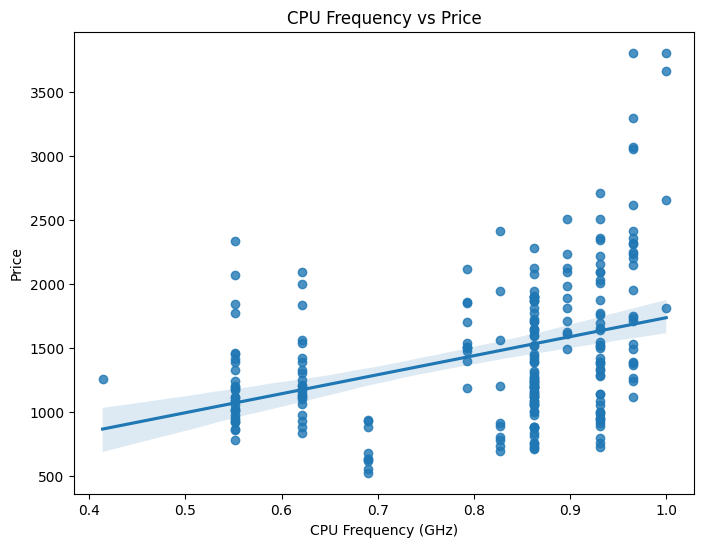

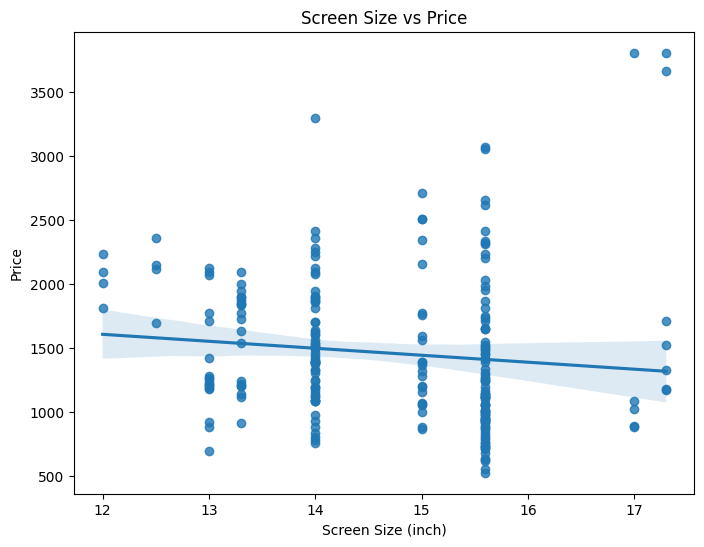

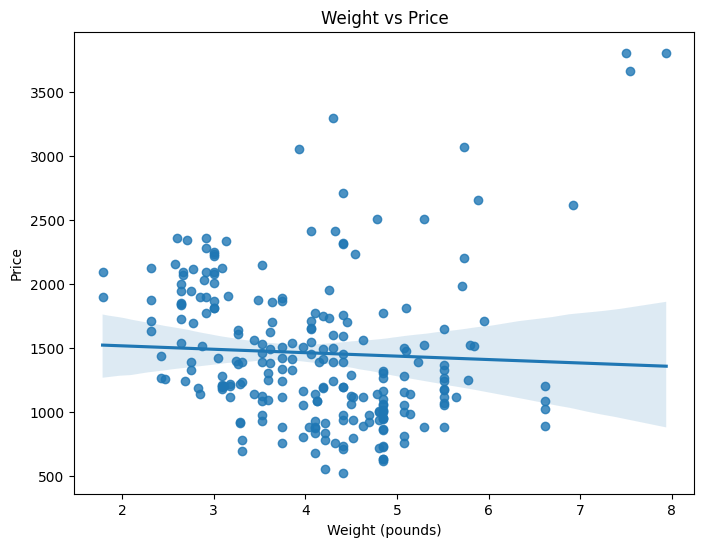

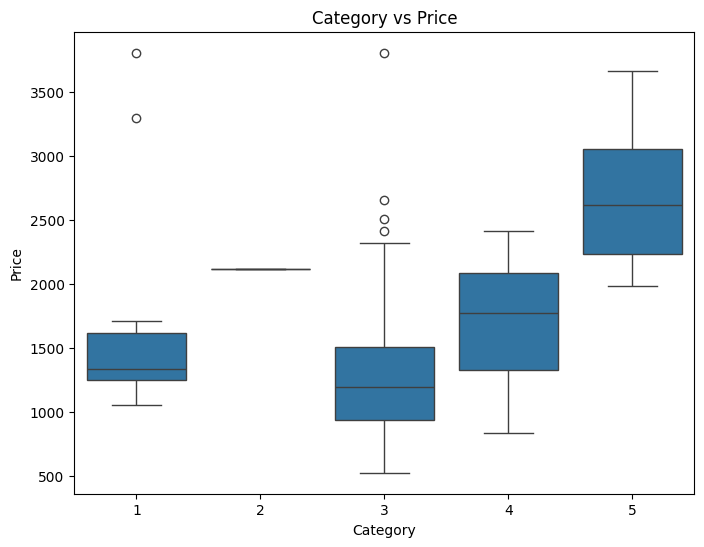

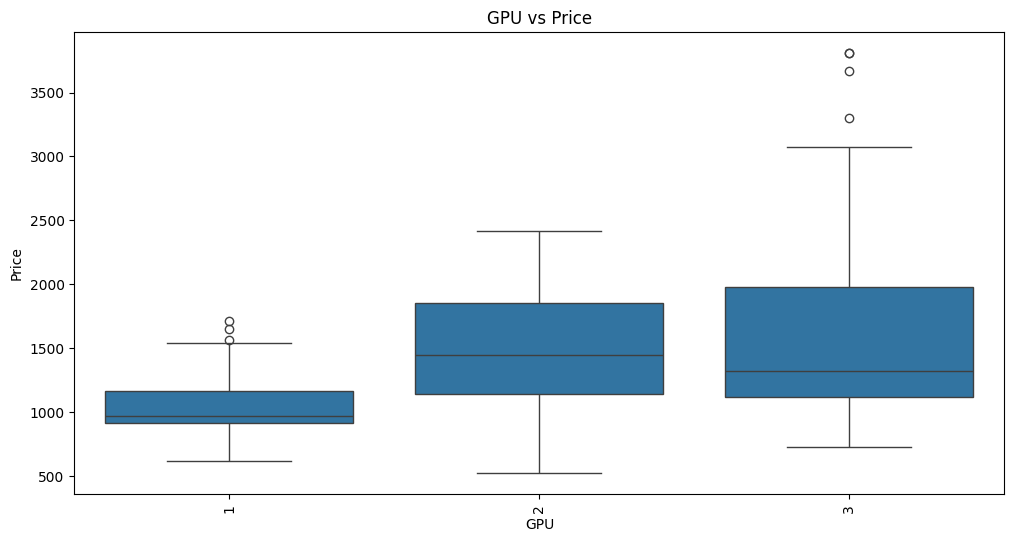

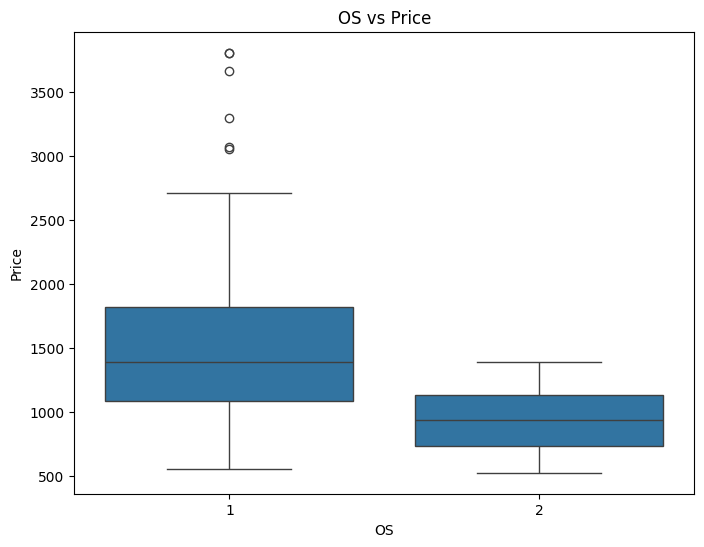

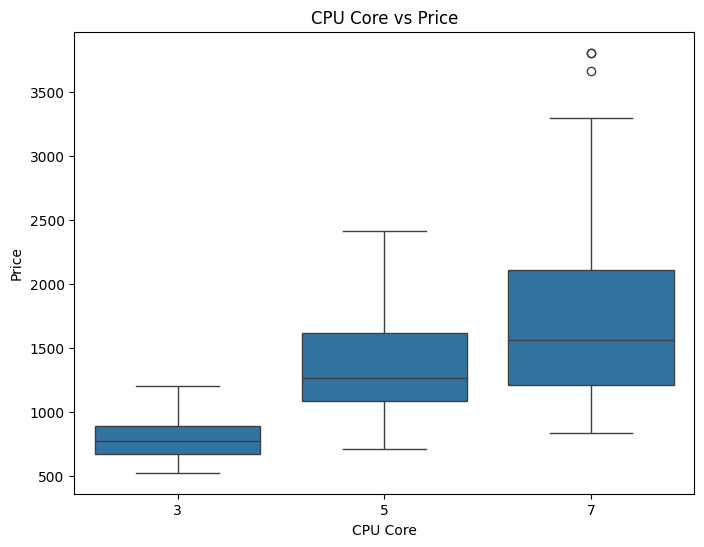

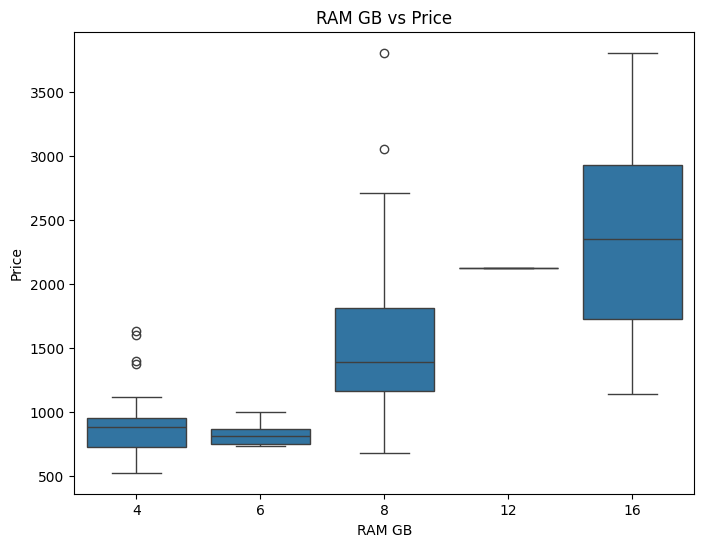

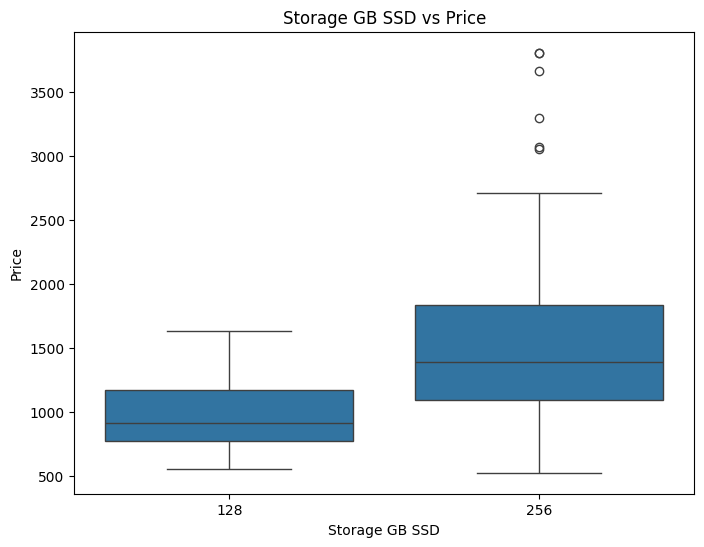

In [4]:
# prompt: Write a Python code to perform the following actions.
# 1. Create regression plots for the attributes "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price" in one plot.
# 2. Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price" in one plot.

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Regression plots
# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create regression plots for each attribute against "Price"
sns.regplot(x="CPU_frequency", y="Price", data=data, ax=axes[0])
sns.regplot(x="Screen_Size_inch", y="Price", data=data, ax=axes[1])
sns.regplot(x="Weight_pounds", y="Price", data=data, ax=axes[2])

plt.tight_layout()
plt.show()

# 2. Box plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(x="Category", y="Price", data=data, ax=axes[0, 0])
sns.boxplot(x="GPU", y="Price", data=data, ax=axes[0, 1])
sns.boxplot(x="OS", y="Price", data=data, ax=axes[0, 2])
sns.boxplot(x="CPU_core", y="Price", data=data, ax=axes[1, 0])
sns.boxplot(x="RAM_GB", y="Price", data=data, ax=axes[1, 1])
sns.boxplot(x="Storage_GB_SSD", y="Price", data=data, ax=axes[1, 2])

plt.tight_layout()
plt.show()


In [5]:
# prompt: Write a Python code for the following.
# 1. Evaluate the correlation value, pearson coefficient and p-values for all numerical attributes against the target attribute "Price".
# 2. Don't include the values evaluated for target variable against itself.
# 3. Print these values as a part of a single dataframe against each individual attrubute.

import pandas as pd
from scipy.stats import pearsonr

numerical_attributes = data.select_dtypes(include=['number']).columns
correlation_results = []

for attribute in numerical_attributes:
  if attribute != 'Price':
    correlation, p_value = pearsonr(data[attribute], data['Price'])
    correlation_results.append([attribute, correlation, p_value])

correlation_df = pd.DataFrame(correlation_results, columns=['Attribute', 'Correlation', 'P-value'])
print(correlation_df)


           Attribute  Correlation       P-value
0       Unnamed: 0.1     0.321933  3.851058e-07
1         Unnamed: 0     0.321933  3.851058e-07
2           Category     0.286243  7.225696e-06
3                GPU     0.288298  6.166950e-06
4                 OS    -0.221730  5.696643e-04
5           CPU_core     0.459398  7.912950e-14
6   Screen_Size_inch    -0.110644  8.853398e-02
7      CPU_frequency     0.366666  5.502463e-09
8             RAM_GB     0.549297  3.681561e-20
9     Storage_GB_SSD     0.243421  1.489892e-04
10     Weight_pounds    -0.050312  4.397694e-01
11    Screen-Full_HD    -0.021075  7.463568e-01
12  Screen-IPS_panel     0.021075  7.463568e-01


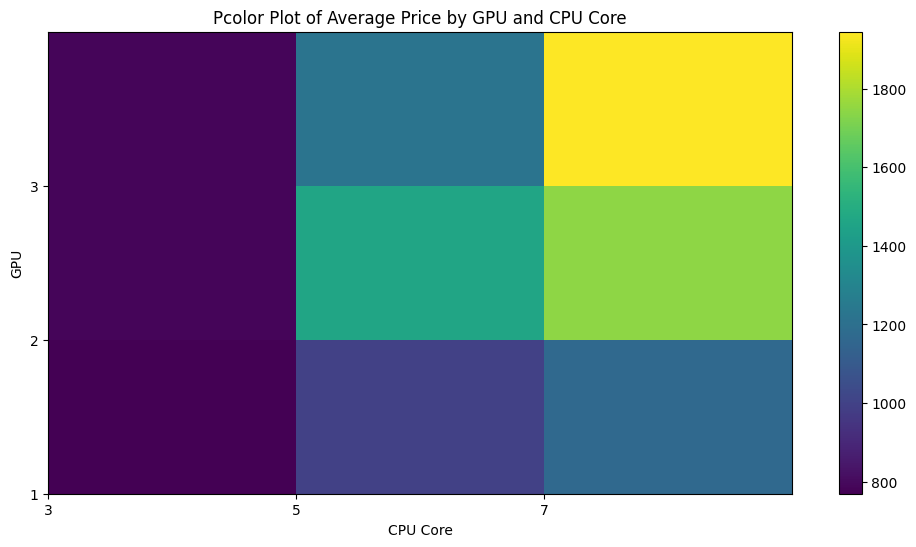

In [6]:
# prompt: Write a python code that performs the following actions.
# 1. Group the attributes "GPU", "CPU_core" and "Price", as available in a dataframe df
# 2. Create a pivot table for this group, assuming the target variable to be 'Price' and aggregation function as mean
# 3. Plot a pcolor plot for this pivot table.

import pandas as pd
import matplotlib.pyplot as plt
grouped_data = data.groupby(['GPU', 'CPU_core'])['Price'].mean().unstack()

# Create a pivot table
pivot_table = pd.pivot_table(data, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Plot a pcolor plot
plt.figure(figsize=(12, 6))
plt.pcolor(pivot_table)
plt.colorbar()
plt.title('Pcolor Plot of Average Price by GPU and CPU Core')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.show()
